In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
rng=np.random.default_rng(seed=42)
rand_values=rng.lognormal(3,1,1000)

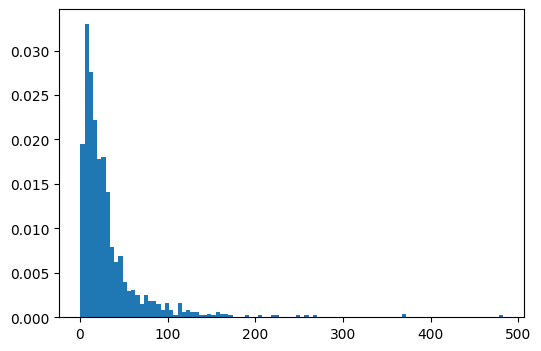

In [3]:
plt.figure(figsize=(6,4))
counts,bins,_=plt.hist(rand_values,100,density=True,label='Log Normal')
x=np.linspace(max(bins),max(bins),1000)
pdf=stats.lognorm.pdf(x,1)
plt.plot(x, pdf, linewidth=2, color='red')
plt.axis('tight')
plt.show()

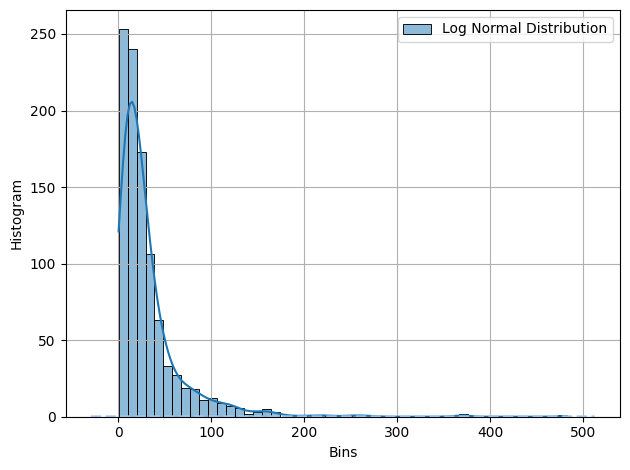

In [4]:
import seaborn as sns
sns.histplot(rand_values,bins=50,kde=True,label='Log Normal Distribution')
sns.kdeplot(rand_values, color='#a1c9f4', lw=2, linestyle='--')
plt.xlabel('Bins')
plt.ylabel('Histogram')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

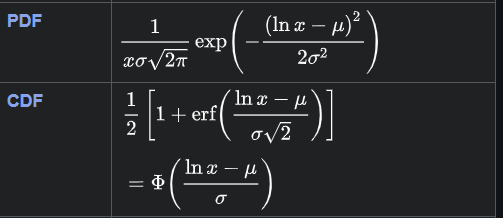

#  if the random variable X is log-normally distributed, then Y = ln X has a normal distribution

<Axes: ylabel='Count'>

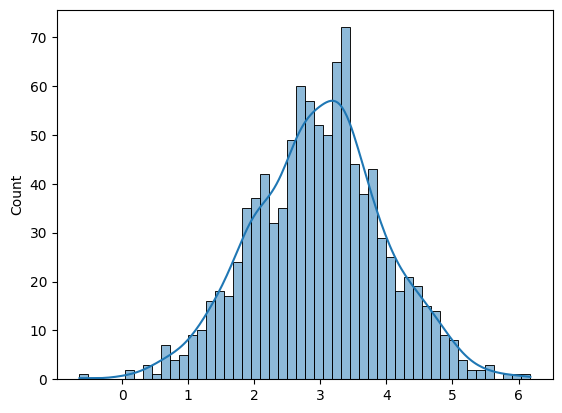

In [16]:
sns.histplot(np.log(rand_values),bins=50,kde=True)

##### Proved 

# Questions

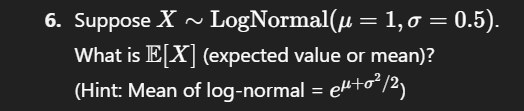

In [5]:
value=rng.lognormal(1,0.5,1000)
value

array([ 2.6388908 ,  1.88769504,  2.20949386,  3.7320407 ,  2.72235318,
        3.22233093,  3.80014651,  2.25371343,  3.96745203,  3.28517953,
        1.46608188,  5.59096776,  2.11621185,  1.18821518,  1.61200403,
        1.63146343,  2.79012573,  2.370438  ,  2.29695427,  3.70562147,
        3.22179185,  3.18363599,  3.33647289,  3.69901783,  0.94745421,
        2.2654669 ,  0.9138352 ,  2.76773685,  2.71199225,  4.58489011,
        4.92250327,  3.00833727,  2.11661785,  3.46454239,  2.08765449,
        2.71638968,  4.45073014,  2.0567238 ,  4.06673034,  3.81408458,
        1.68641351,  4.42357001,  3.85466141,  2.8604042 ,  1.85676973,
        1.76896918,  2.0775072 ,  3.56547481,  1.68571097,  3.38297711,
        1.46100161,  2.45460465,  2.87146938,  9.23097865,  1.36525629,
        5.6746409 ,  2.92976205,  3.33871486,  2.88398771,  3.39520251,
        2.51722586,  5.62389841,  2.16358037,  4.78802154,  1.96957235,
        2.6376123 ,  1.59045275,  3.41272762,  5.59885985,  2.61

In [6]:
mu=1
s=0.5
mean=np.exp((mu+(s)**2)/2)
mean

np.float64(1.8682459574322223)

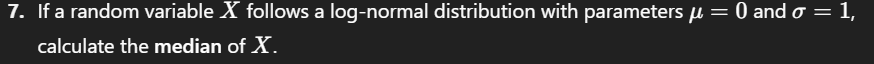

<Axes: >

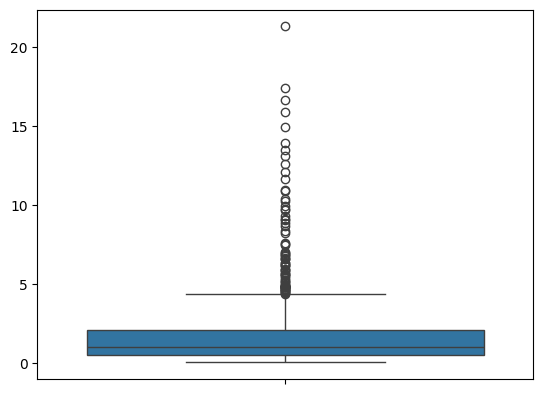

In [7]:
mu=0
s=1
value=rng.lognormal(mu,s,1000)
sns.boxplot(value)

There are many outlier

In [8]:
q1,q3=np.percentile(value,[25,75])
iqr=q3-q1

In [9]:
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)

In [11]:
value=pd.Series(value)
value=value[value>ub]

In [12]:
np.median(value)

np.float64(6.304449250843879)

In [13]:
value

11      5.913175
14      4.904822
42      6.796752
53     17.416855
61      5.597723
         ...    
981     4.689060
987     4.884192
991     5.090629
993    10.915925
997    10.288478
Length: 75, dtype: float64

#### A company's stock price tends to grow multiplicatively over time. Would a log-normal distribution be appropriate for modeling it? Why?

<Axes: ylabel='Count'>

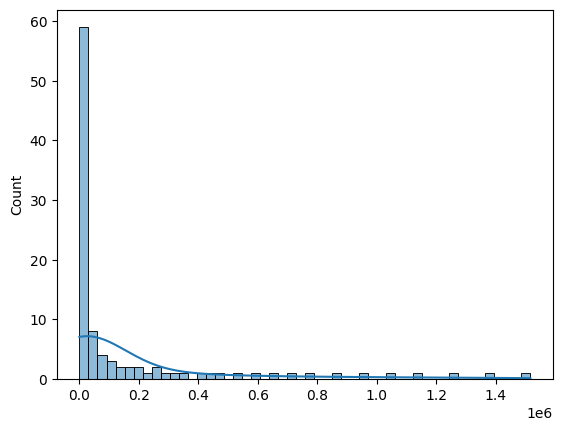

In [26]:
stock_price=100 # initial price 
growth=1.10  # 10 percent growth each day
price_lst=[]
for i in range(101):  # value concluding with in 100 days
    stock_price*=growth
    price_lst.append(stock_price)

sns.histplot(price_lst,bins=50,kde=True)
    

#### Yes for this data lognormal distribution is good and it is working well with it because each value is increasing

3. You have salary data of 10,000 employees. The data is strictly positive and right-skewed.
Which transformation would make it approximately normal for easier modeling?

In [27]:
check_value=rng.lognormal(0,1,100000)
check_value=pd.Series(check_value)
positive_val=check_value[check_value>0]
salary=positive_val[:10001]


<Axes: ylabel='Count'>

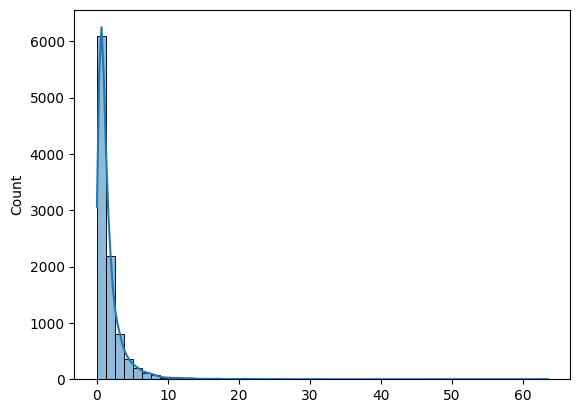

In [30]:
sns.histplot(salary,bins=50,kde=True)


In [33]:
df=pd.DataFrame(salary)
df


,0
0,3.486934
1,1.989120
2,7.142962
3,0.212708
4,0.766930
...,...
9996,0.543503
9997,0.813079
9998,0.816463
9999,1.726813


<Axes: ylabel='Count'>

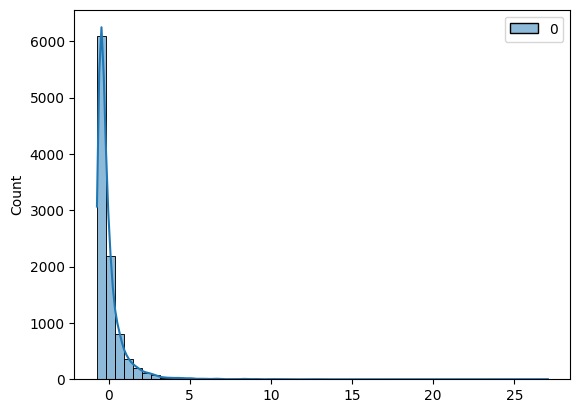

In [36]:
# 1. using standardization on data
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
standard_val=model.fit_transform(df)
sns.histplot(standard_val,bins=50,kde=True)
# Failed to go with standard scalar

In [37]:
# Now moving with the property i.e log of lognormal data is normally distributed

<Axes: ylabel='Count'>

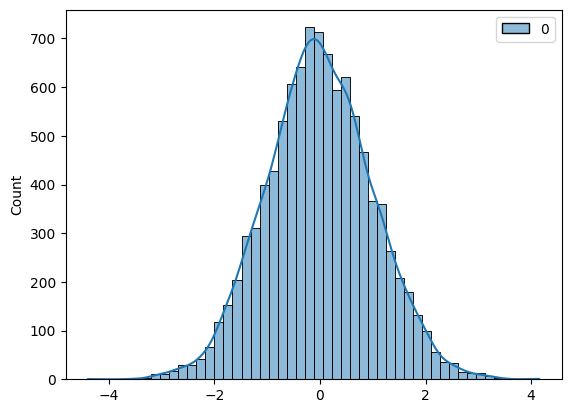

In [38]:
df_log=np.log(df)
sns.histplot(df_log,bins=50,kde=True)

##### Successfully done

### 4. Min Max Scalar

<Axes: ylabel='Count'>

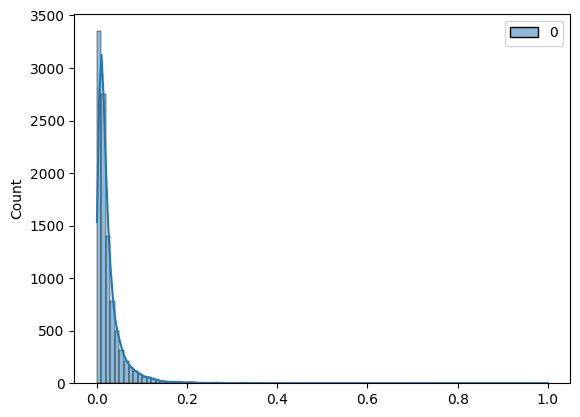

In [39]:
from sklearn.preprocessing import MinMaxScaler
model=MinMaxScaler()
sns.histplot(model.fit_transform(df),bins=100,kde=True)

---> Not working with min max scalar

#### What happens to the shape of a log-normal distribution as 𝜎 (standard deviation of the log) increases?

In [45]:
print(rng.lognormal(1,0,10))
print(rng.lognormal(1,2,10))
print(rng.lognormal(1,3,10))

[2.71828183 2.71828183 2.71828183 2.71828183 2.71828183 2.71828183
 2.71828183 2.71828183 2.71828183 2.71828183]
[ 1.377791    1.55339854 25.12836248  7.54305808  0.32042969  1.57130796
  4.97043375  0.76817292  6.54616709  3.48065213]
[7.75321437e+01 2.60114111e+01 7.03888648e-01 3.09014831e+00
 2.72976657e-01 1.32855683e+03 2.08746276e+01 4.15359216e-02
 1.34003577e+00 2.06972132e-02]


In [40]:
random_vals=rng.lognormal(1,0,1000)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_4380\2920061267.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(vals_std,bins=100,kde=True,palette='rainbow')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_4380\2920061267.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(vals_std,bins=100,kde=True,palette='rainbow')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_4380\2920061267.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(vals_std,bins=100,kde=True,palette='rainbow')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_4380\2920061267.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(vals_std,bins=100,kde=True,palette='rainbow')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_4380\2920061267.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(vals_std,bins=100,kde=True

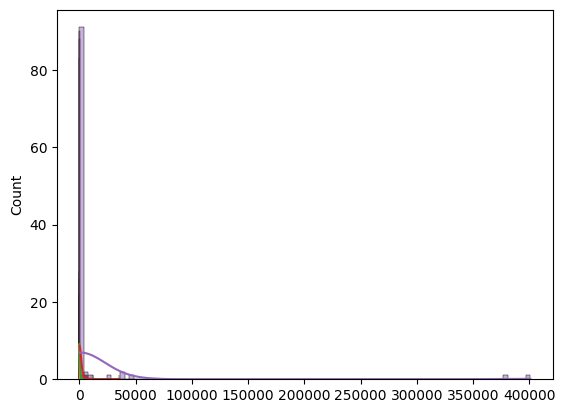

In [52]:
std=[1,2,3,4,5]
for i in range(5):
    vals_std=rng.lognormal(1,std[i],100)
    sns.histplot(vals_std,bins=100,kde=True,palette='rainbow')